# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Jasmín Quiero

* __Rol__: 201810516-3

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

## Desripición columnas DataFrame

In [6]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


## Distribución de los datos

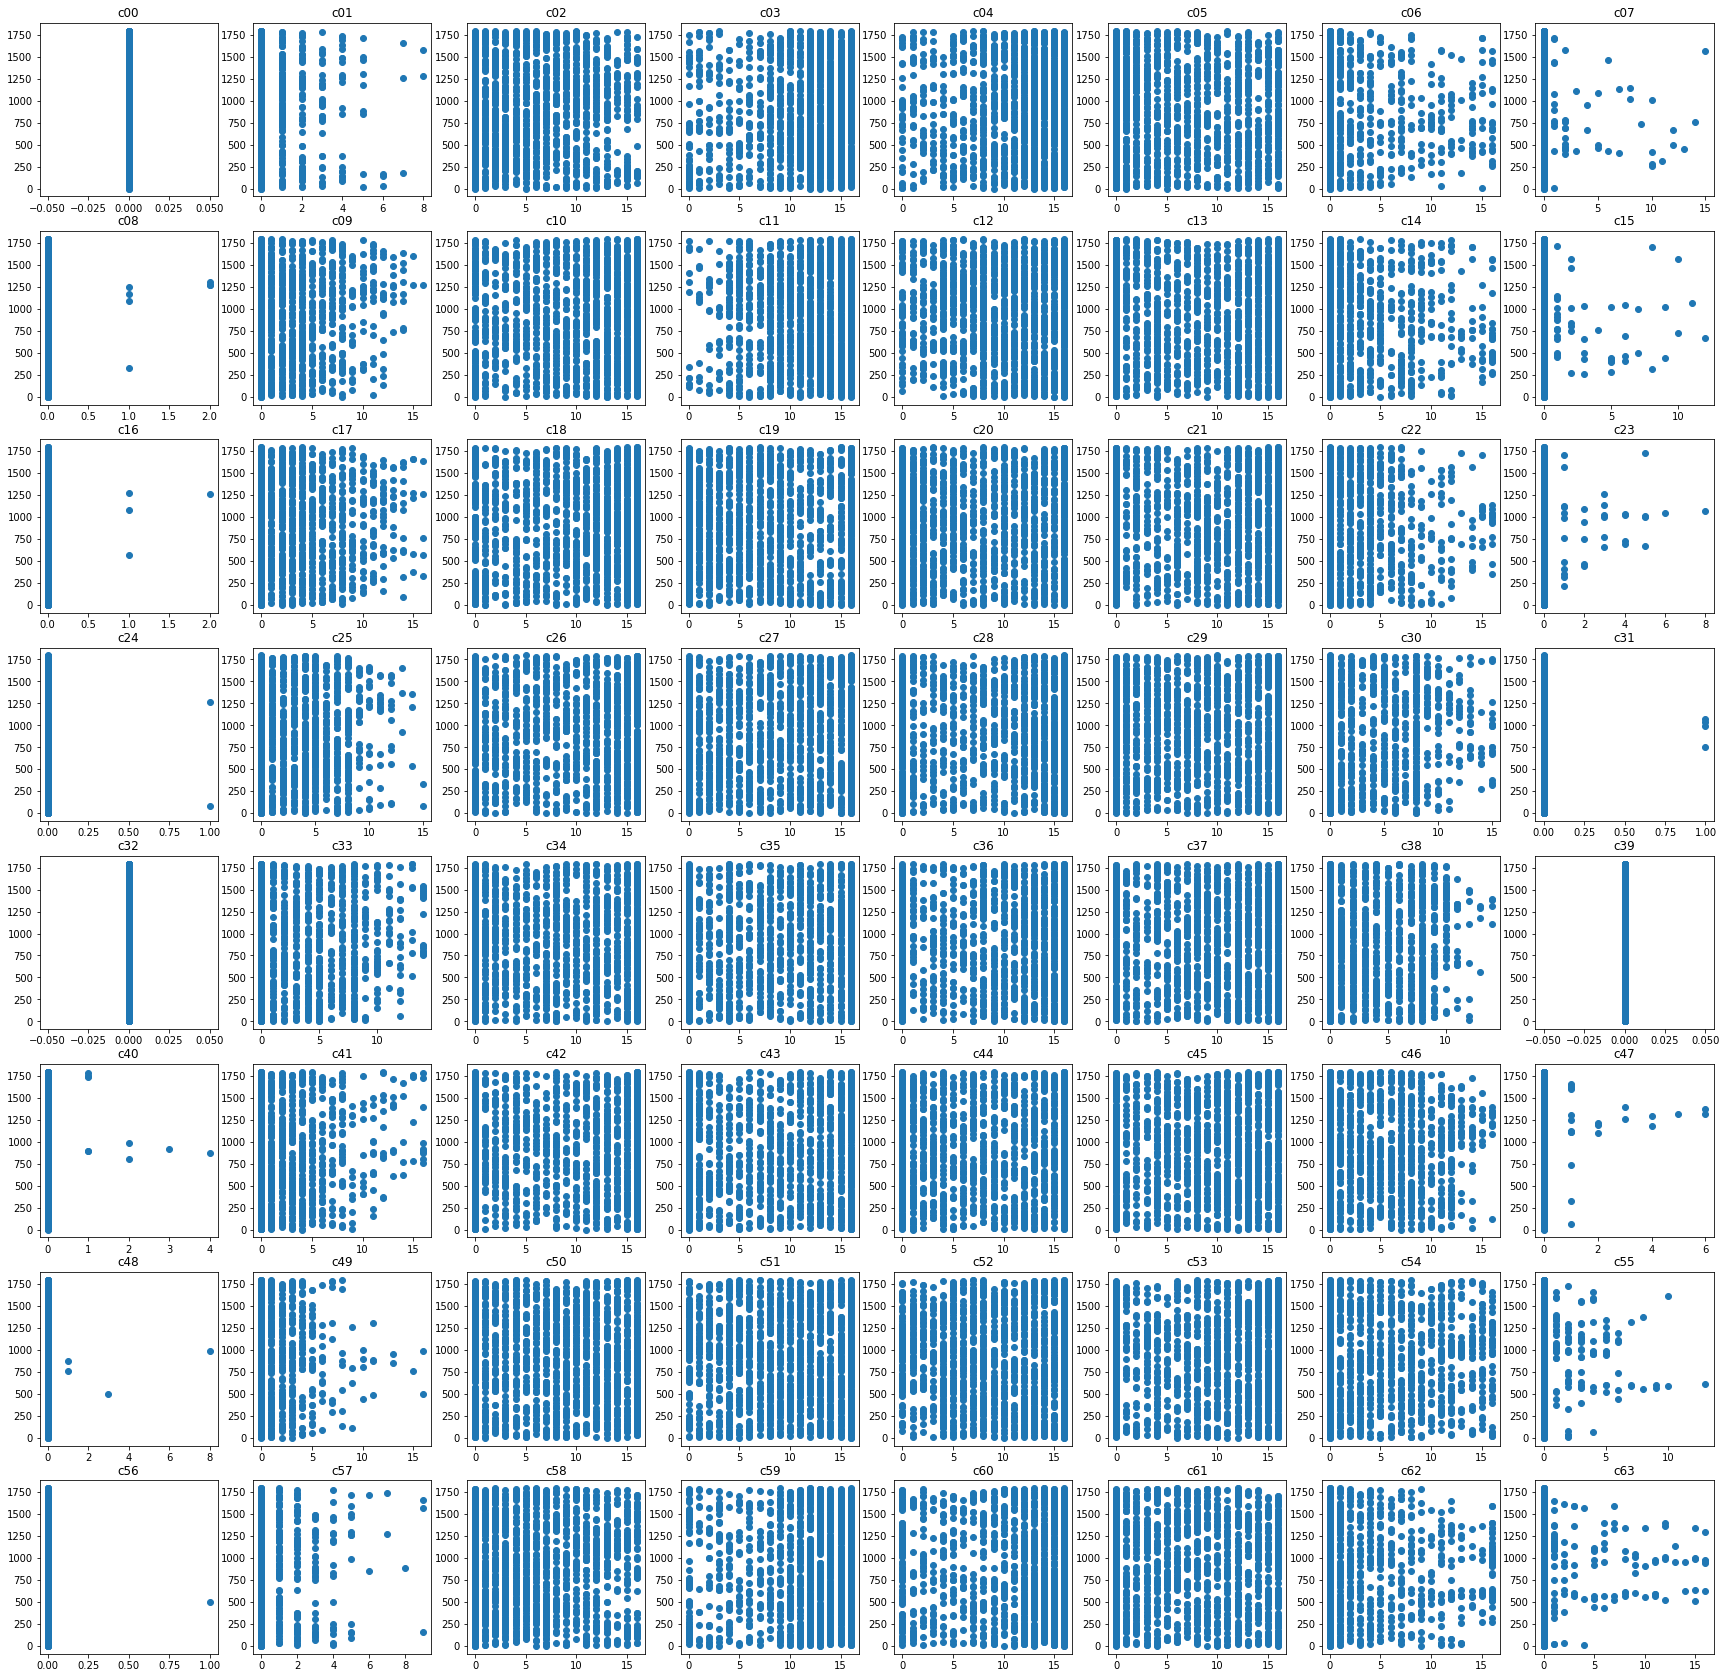

In [7]:
c = digits.columns
y = [k for k in range(len(digits))]
plt.figure(figsize = (30,30))
for k in range(64):
    plt.subplot(8,8,k+1)
    plt.scatter(digits[c[k]], y)
    plt.title(c[k])

## Cantidad de memoria utilizada

In [8]:
memoria_columas = digits.memory_usage()#memoria usada por columna
s = 0
for i in range(0,len(memoria_columas)):
    s += memoria_columas[i]#Se suma la memoria de las columnas
print('La memoria por columnas es:')
print(memoria_columas)
print('La memoria utilizada es:',s, 'bytes.')

La memoria por columnas es:
Index      128
c00       7188
c01       7188
c02       7188
c03       7188
          ... 
c60       7188
c61       7188
c62       7188
c63       7188
target    7188
Length: 66, dtype: int64
La memoria utilizada es: 467348 bytes.


## Tipos de datos

In [9]:
digits.dtypes.unique()

array([dtype('int32')], dtype=object)

Los datos de todas las columnas son enteros.

## Cantidad registro de clases

In [10]:
c_r = (pd.value_counts(digits.target)
            .to_frame()
            .reset_index()
            .sort_values(by = "index")
            .rename(columns = {"index": "Clase", "target": "Cantidad"})
            .reset_index(drop = True)
           )#dataframe con la cantidad de registros por clase
c_r

,Clase,Cantidad
0,0,178
1,1,182
2,2,177
3,3,183
4,4,181
5,5,182
6,6,181
7,7,179
8,8,174
9,9,180


## Valores nulos

In [11]:
digits.isnull().values.any()

False

No hay valores nulos.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [12]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

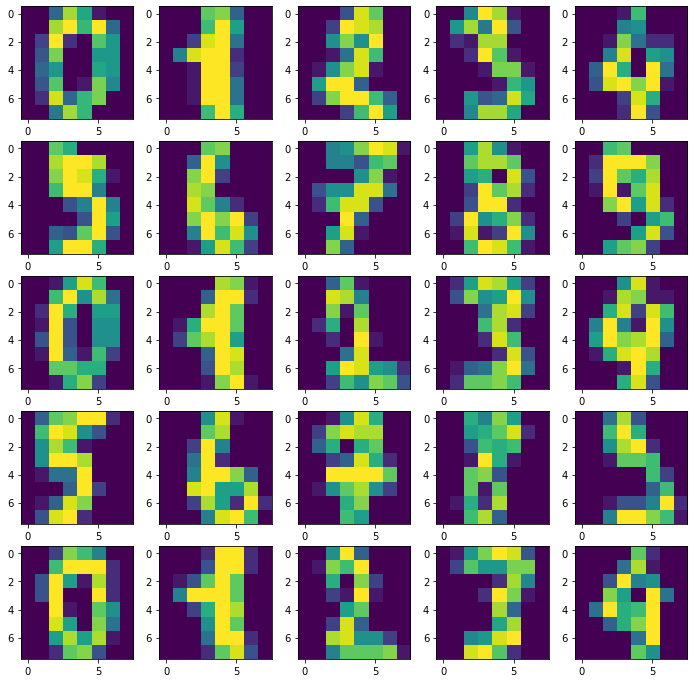

In [13]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx):
    for k in range(ny):
        img = digits_dict["images"][k + 5*i] #muestra en orden las imagenes
        axs[i,k].imshow(img)
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [14]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [15]:
import metrics_classification as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import time

In [16]:
#Crear conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)
#largo del conjunto de entrenamiento y de testeo
print('El train set tiene',len(X_train), 'filas.')
print('El test set tiene',len(X_test), 'filas.')

El train set tiene 1257 filas.
El test set tiene 540 filas.


## Regresión Logística

In [17]:
m_lr = {
          'penalty' : ['l1', 'l2'],
          'C' : [100, 10 , 1, 0.1, 0.01],
          'class_weight' : ['balanced', None],
          'solver' : ['liblinear'],
          }#Hiper-parámetros a comparar con gridsearch

lr = LogisticRegression()

lr_g = GridSearchCV(estimator = lr, param_grid = m_lr, cv = 10)

start_time = time.time() #Tiempo de inicio 

lr_g_result = lr_g.fit(X_train, y_train)

# Se presenta el tiempo que tomó ajustarse el modelo
print('Tomó %s segundos' % (time.time() - start_time)) 

Tomó 43.49180769920349 segundos


In [18]:
print('El mejor score tuvo un valor de %f usando %s' % (lr_g_result.best_score_, lr_g_result.best_params_))

El mejor score tuvo un valor de 0.963390 usando {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
y_pred = lr_g.predict(X_test)#Predicción del modelo
print('La matriz de confusión asociada es: \n \n',confusion_matrix(y_test,y_pred), '\n \n y las métricas son:')
df = pd.DataFrame(
    {
        'y': y_test,
        'yhat': y_pred
    }
)
metrics.summary_metrics(df)

La matriz de confusión asociada es: 
 
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 45  1  0  0  0  0  0  4  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  1  0  0  2  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  1  1  0  0 62  1  1  0  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 0  0  0  1  0  0  0  0  4 54]] 
 
 y las métricas son:


,accuracy,recall,precision,fscore
0,0.9574,0.958,0.9563,0.9563


Se tiene que las metricas son aproximadamente 96% por lo tanto el modelo tuvo el mismo desempeño para clasificar las clases positivas y las clases negativas.

## K-Nearest Neighbours

In [20]:
m_knn = {
          'n_neighbors' : [3, 6, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }#Hiper-parámetros a comparar con gridsearch

knn = KNeighborsClassifier()

knn_g = GridSearchCV(estimator = knn, param_grid = m_knn, cv = 10)

start_time = time.time() #Tiempo de inicio 

knn_g_result = knn_g.fit(X_train, y_train)

# Se presenta el tiempo que tomó ajustarse el modelo
print('Tomó %s segundos' % (time.time() - start_time)) 

Tomó 9.668474674224854 segundos


In [21]:
print('El mejor score tuvo un valor de %f usando %s'% (knn_g_result.best_score_, knn_g_result.best_params_))

El mejor score tuvo un valor de 0.986470 usando {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [22]:
y_pred = knn_g.predict(X_test)#Predicción del modelo
print('La matriz de confusión asociada es: \n \n',confusion_matrix(y_test,y_pred), '\n \n y las métricas son:')
df = pd.DataFrame(
    {
        'y': y_test,
        'yhat': y_pred
    }
)
metrics.summary_metrics(df)

La matriz de confusión asociada es: 
 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  0  0  1 55]] 
 
 y las métricas son:


,accuracy,recall,precision,fscore
0,0.9889,0.9891,0.989,0.9889


Se tiene que las metricas son aproximadamente 99% por lo tanto el modelo tuvo el mismo desempeño para clasificar las clases positivas y las clases negativas y el algoritmo se demoró menos en ejecutarse.

## SVC

In [23]:
m_svc = {
            'C':[1,10,100,1000],
            'gamma':[1,0.1,0.001,0.0001], 
            'kernel':['linear','rbf']
          }#Hiper-parámetros a comparar con gridsearch

svc = SVC()

svc_g = GridSearchCV(estimator = svc, param_grid = m_svc, cv = 10)

start_time = time.time()#Tiempo de inicio

svc_g_result = svc_g.fit(X_train, y_train)

# Se presenta el tiempo que tomó ajustarse el modelo
print('Tomó %s segundos' % (time.time() - start_time))

Tomó 28.99043893814087 segundos


In [24]:
print('El mejor score tuvo un valor de %f usando %s'% (svc_g_result.best_score_, svc_g_result.best_params_))

El mejor score tuvo un valor de 0.991251 usando {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [25]:
y_pred = svc_g.predict(X_test)#Predicción del modelo
print('La matriz de confusión asociada es: \n \n',confusion_matrix(y_test,y_pred), '\n \n y las métricas son:')
df = pd.DataFrame(
    {
        'y': y_test,
        'yhat': y_pred
    }
)
metrics.summary_metrics(df)

La matriz de confusión asociada es: 
 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  0  0  0  1  0 57]] 
 
 y las métricas son:


,accuracy,recall,precision,fscore
0,0.9907,0.9911,0.9908,0.9909


Se tiene que las metricas son aproximadamente 100% por lo tanto el modelo tuvo el mismo desempeño para clasificar las clases positivas y las clases negativas y el algoritmo se demoró menos en ejecutarse.

## ¿Cuál modelo es mejor basado en sus métricas?

Se observa fijándose en las métricas que el mejor modelo es SVC.

## ¿Cuál modelo demora menos tiempo en ajustarse?

El modelo que se demoró menos en ajustarse fue K-Nearest Neighbors.

## ¿Qué modelo escoges?

Escogería el modelo de K-Nearest Neighbors pues sus metricas son de un 99% aprox y tiene el menor tiempo de ejecución, que es aproximadamente un tercio del tiempo de SVC que tiene un 100% aprox en las metricas.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

Se usara K-Nearest Neighbors.

## Cross validation

In [26]:
from sklearn.model_selection import cross_val_score

precision = cross_val_score(estimator=knn_g,
                            X=X_train,
                            y=y_train,
                            cv=10)

precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision), np.std(precision)))

Precisiones: [1.0, 0.98, 0.98, 0.98, 0.98, 0.99, 1.0, 0.98, 0.98, 0.99] 
Precision promedio:  0.986 +/-  0.008


## Curva de Validación

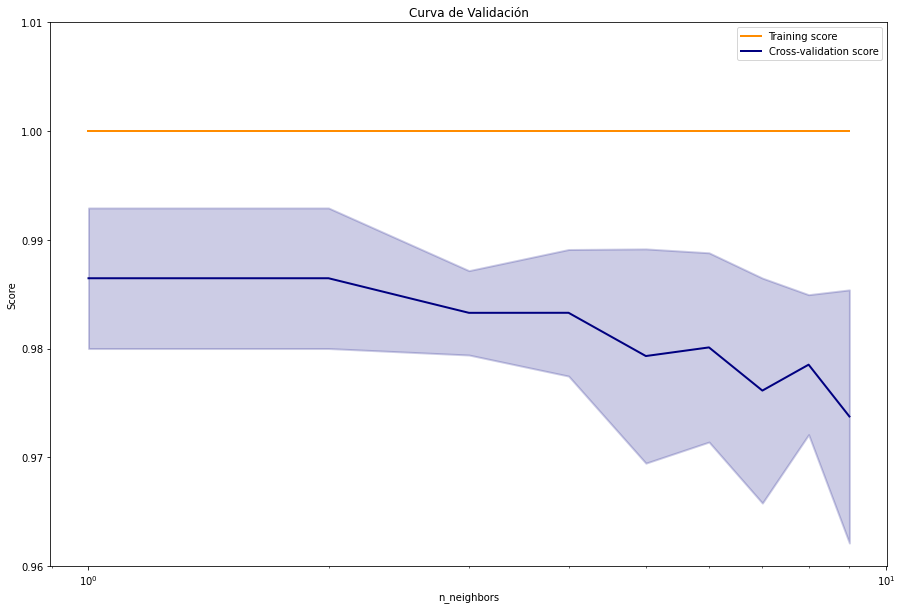

In [27]:
#Curva de validación con código en el link del enunciado
from sklearn.model_selection import validation_curve
param_range = np.array([i for i in range(1, 10)])

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'auto', metric = 'euclidean'),
    X_train,
    y_train,
    param_name='n_neighbors',
    param_range=param_range,
    scoring='accuracy',
    n_jobs=1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))
plt.title('Curva de Validación')
plt.xlabel('n_neighbors')
plt.ylabel('Score')

plt.ylim(0.96, 1.01)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)

plt.fill_between(param_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2,
                 color="darkorange",
                 lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)

plt.fill_between(param_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2,
                 color="navy",
                 lw=lw)

plt.legend(loc="best")

plt.show()

Se observa que la curva de training se mantiene constante en 1, esto puede deberse simplemente a la naturaleza del modelo ya que lo que se está haciendo es que K-Nearest Neighbors se aprende bien el conjunto de datos al punto de que siempre acierta a la predicción.

Por otro lado notamos que la curva de cross validation, con respecto al score de Accuracy, luego de alcanzar su valor máximo empieza a decaer, lo que tiene mucho sentido debido a como funciona K-Nearest Neighbors. Con esto me refiero que a medida que acumenta la cantidad de neighbors es mas probable que agrupe una mayor cantidad de datos errados con respecto a los correctos. Por lo tanto a medida que aumentamos los neighbors existe tendencia a tener overfitting.

## Curva AUC–ROC

In [28]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
y = label_binarize(y, classes=digits["target"].unique())
n_classes = y.shape[1]

n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size = 0.7, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'auto', metric = 'euclidean'))
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

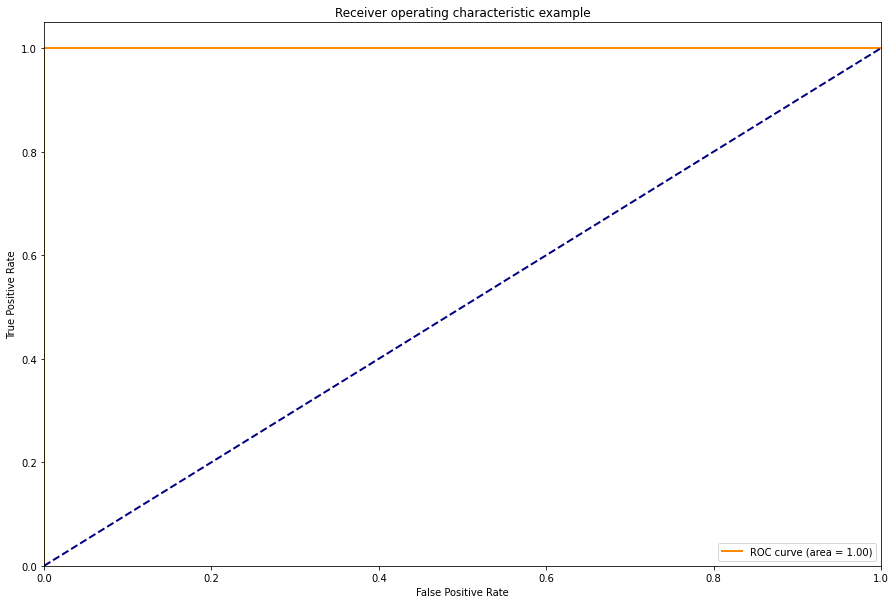

In [29]:
plt.figure(figsize=(15,10))
lw = 2
plt.plot(fpr[2],
         tpr[2],
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

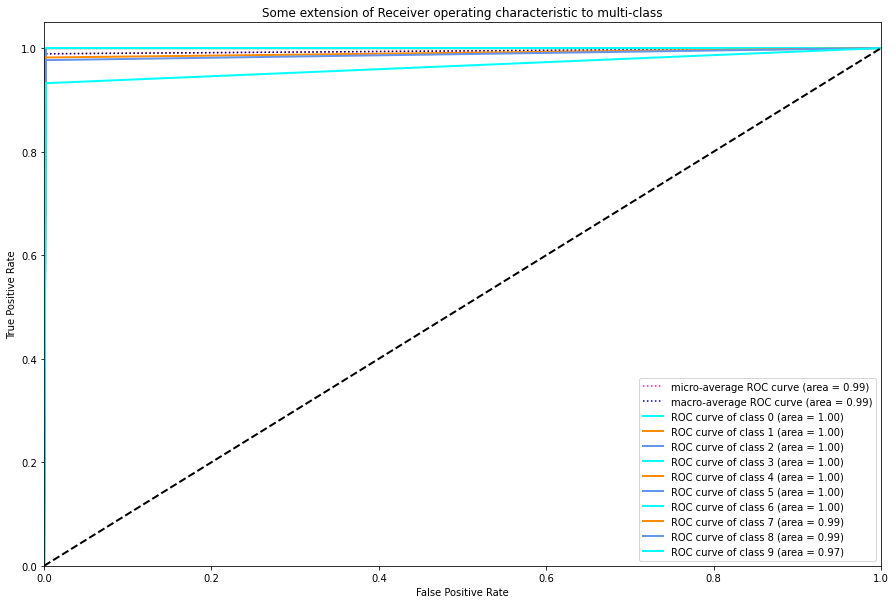

In [30]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(15,10))

plt.plot(fpr["micro"],
         tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink',
         linestyle=':')

plt.plot(fpr["macro"],
         tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy',
         linestyle=':')

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i],
             tpr[i],
             color=color,
             lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

En este caso vemos que al igual que la curva anterior como el modelo predice tan bien el problema que la mayoria de los datos obtiene excelentes predicciones, sin embargo, habiendo dicho esto, las curvas con una leve inclinación, se deben a que el modelo aun si fue bastante bueno en las métricas, no fue perfecto.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


## Selección de atributos

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Separamos las columnas objetivo
x_training = digits.drop(['c00','c32','c39','target'], axis=1) #Se dropean las columnas constantes que se pueden observar en distribucion de los datos
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 25  # número de atributos a seleccionar
columns = list(x_training.columns.values)
seleccion = SelectKBest(f_classif, k=k).fit(x_training, y_training)
catrib = seleccion.get_support()
atributos = [columns[i] for i in list(catrib.nonzero()[0])]
atributos

['c02',
 'c10',
 'c13',
 'c18',
 'c19',
 'c20',
 'c21',
 'c26',
 'c27',
 'c28',
 'c30',
 'c33',
 'c34',
 'c35',
 'c36',
 'c38',
 'c42',
 'c43',
 'c44',
 'c46',
 'c53',
 'c54',
 'c58',
 'c60',
 'c61']

## Comparación datos de selección de atributos con los datos completos

digits tiene 116805 elementos
d_atributos tiene 46722 elementos


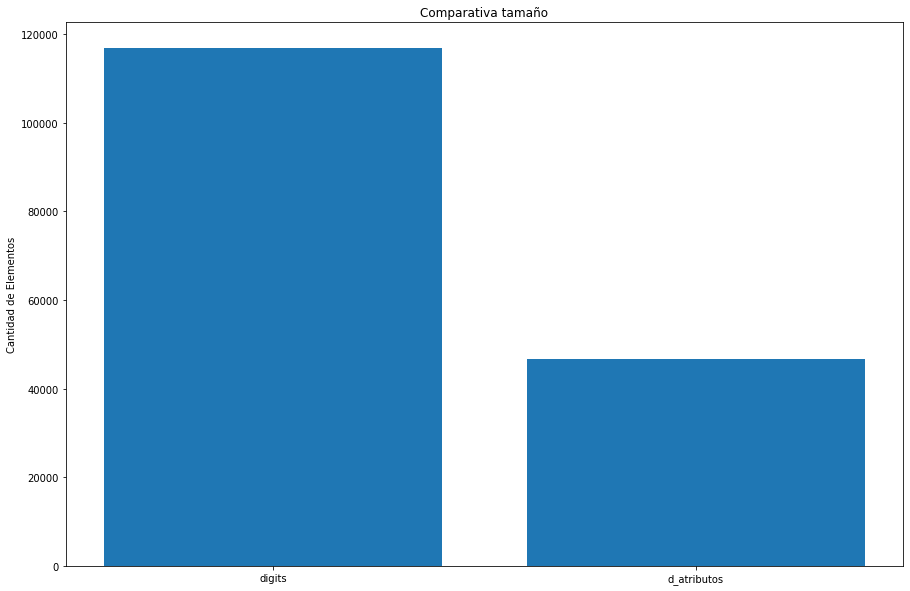

In [32]:
d_atributos = digits[atributos + ['target']]
print('digits tiene', digits.size, 'elementos')
print('d_atributos tiene', d_atributos.size, 'elementos')

fig = plt.figure(figsize=(15,10))
plt.bar(x =['digits', 'd_atributos'], height = [digits.size, d_atributos.size])
plt.title('Comparativa tamaño')
plt.ylabel('Cantidad de Elementos')
plt.show()

digits usa un total de: 467348 bytes
d_atributos usa un total de: 187016 bytes


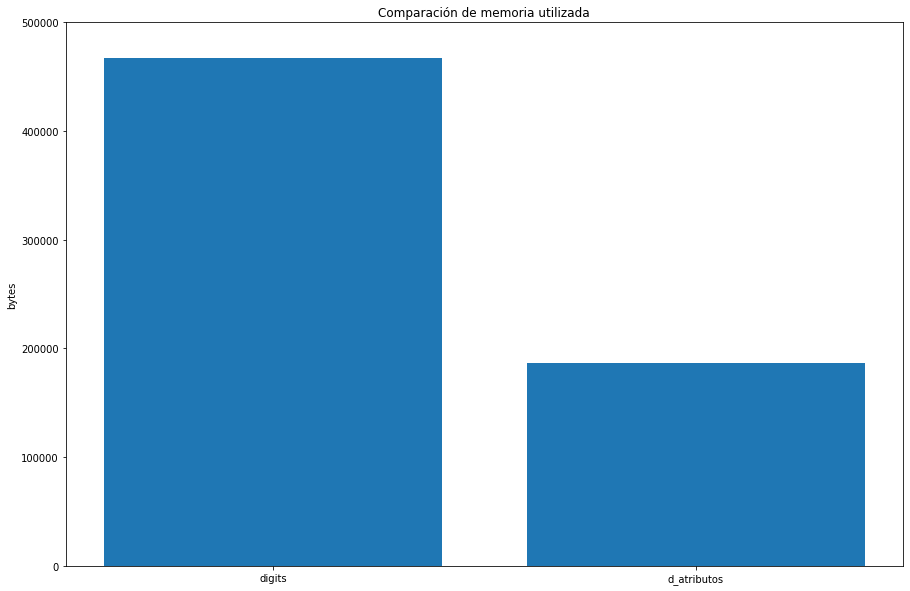

In [33]:
#Se suma la memoria de cada columna para conocer el total
s2 = 0
memoria = d_atributos.memory_usage() #Se determina la memoria usada en el DataFrame nuevo por columna
for i in range(0,len(memoria)):
    s2 += memoria[i] 
print('digits usa un total de:', s, 'bytes')
print('d_atributos usa un total de:',s2, 'bytes')

lista = [1e5 * i for i in range(6)]#se multiplica para que se vea mejor el gráfico
fig = plt.figure(figsize=(15,10))
plt.bar(x = ['digits', 'd_atributos'], height = [s,s2])
plt.yticks(lista)
plt.title('Comparación de memoria utilizada')
plt.ylabel('bytes')
plt.show()

In [34]:
X = digits.drop('target',axis = 1)
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
start_time = time.time()
knn_g.fit(X_train, y_train)
time_original = time.time() - start_time#tiempo en que se ejecutó el modelo
print('El modelo se ejecutó en %s segundos con digits' % (time_original)) 

El modelo se ejecutó en 11.78723955154419 segundos con digits


In [35]:
X = d_atributos.drop('target',axis=1)
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
start_time = time.time()
knn_g.fit(X_train, y_train)
time_atributos = time.time() - start_time#tiempo en que se ejecutó el modelo
print('El modelo se ejecutó en %s segundos con d_atributos' % (time_atributos)) 

El modelo se ejecutó en 7.478937864303589 segundos con d_atributos


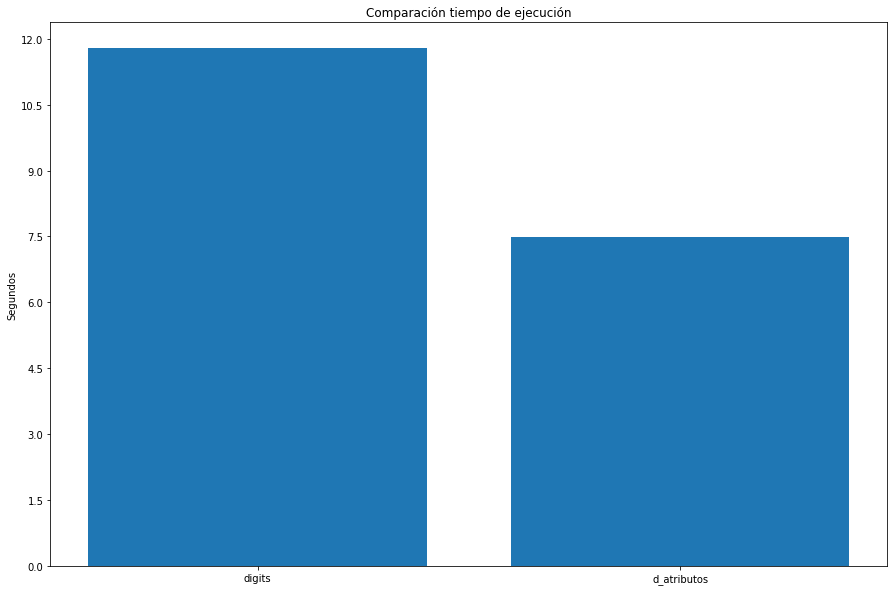

In [36]:
lista = [1.5 * i for i in range(9)]#se multiplica para que se vea mejor el gráfico
fig = plt.figure(figsize=(15,10))
plt.bar(x = ['digits', 'd_atributos'], height = [time_original,time_atributos])
plt.yticks(lista)
plt.title('Comparación tiempo de ejecución')
plt.ylabel('Segundos')
plt.show()

Se observa que en todos los casos d_atributos tiene menores valores.

## Extracción de atributos

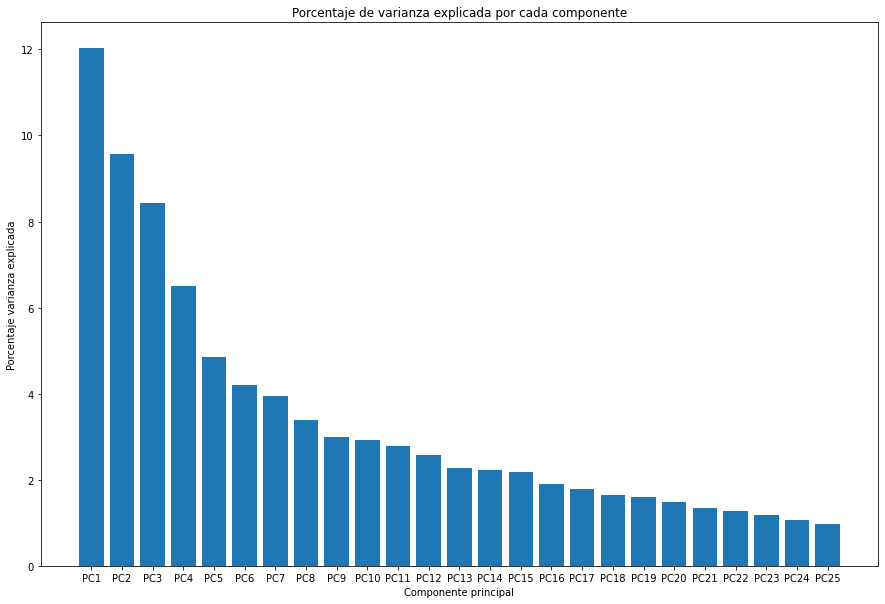

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Se estandarizan los datos porque PCA es suceptible a la distribución de los datos
x = digits.drop('target',axis =1).values
y = digits['target'].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=25)
principalComponents = pca.fit_transform(x)

# gráfico varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [f'PC{i}' for i in range(1,26)]

plt.figure(figsize=(15,10))
plt.bar(x= range(1,26), height=percent_variance, tick_label=columns)
plt.ylabel('Porcentaje varianza explicada')
plt.xlabel('Componente principal')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

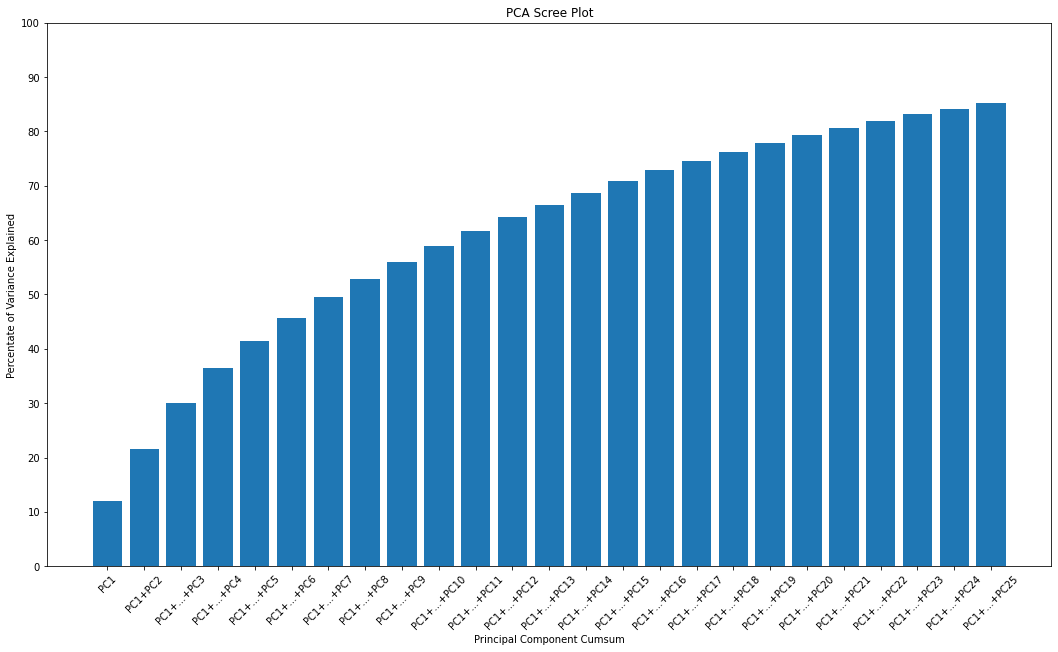

In [38]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns_sum =[f'PC1+...+PC{i+1}' for i in range(2,25)]
columns_sum = ['PC1', 'PC1+PC2'] + columns_sum

plt.figure(figsize=(18,10))
plt.bar(x= range(1,26), height=percent_variance_cum, tick_label=columns_sum)
plt.ylabel('Percentate of Variance Explained')
plt.yticks([10*i for i in range(11)])
plt.xlabel('Principal Component Cumsum')
plt.xticks(rotation = 45)
plt.title('PCA Scree Plot')
plt.show()

In [39]:
pD = pd.DataFrame(data = principalComponents, columns = columns)
targetD = digits[['target']]
d_pca = pd.concat([pD, targetD],axis = 1)
d_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
0,1.914213,-0.954500,-3.946038,2.028718,-0.267128,0.530441,-1.415323,1.496455,0.124776,-0.822247,...,0.194438,-0.092671,0.415763,0.422891,0.450054,-0.565466,0.511529,-0.749147,-0.455371,0
1,0.588982,0.924638,3.924754,-1.779867,-0.993329,-0.675681,1.878642,0.556599,1.079922,0.087506,...,-0.095788,-0.418465,0.556267,-0.084527,0.917441,0.262693,-0.459754,0.461486,0.798786,1
2,1.302046,-0.317181,3.023335,-2.043355,-2.081178,0.935314,-1.296274,1.156450,0.786046,-1.099305,...,-0.234141,-0.466262,-1.068364,-1.154749,-0.526851,-0.034327,-1.294944,-0.390701,-0.429597,2
3,-3.020771,-0.868773,-0.801742,-2.187061,-0.556776,0.726977,0.959859,-1.383003,0.259178,0.744807,...,-0.951393,-0.398424,1.492276,0.305208,0.549110,0.187265,0.570892,-0.561059,-0.093690,3
4,4.528945,-1.093485,0.973124,-1.419487,-1.715242,1.431394,1.073696,-0.968667,-1.660453,1.174408,...,-0.106935,-0.550407,1.610534,1.110031,0.494166,0.168262,0.947163,-0.176262,0.565234,4


## Comparación datos d_pca con digits

digits tiene 116805 elementos
d_pca tiene 46722 elementos


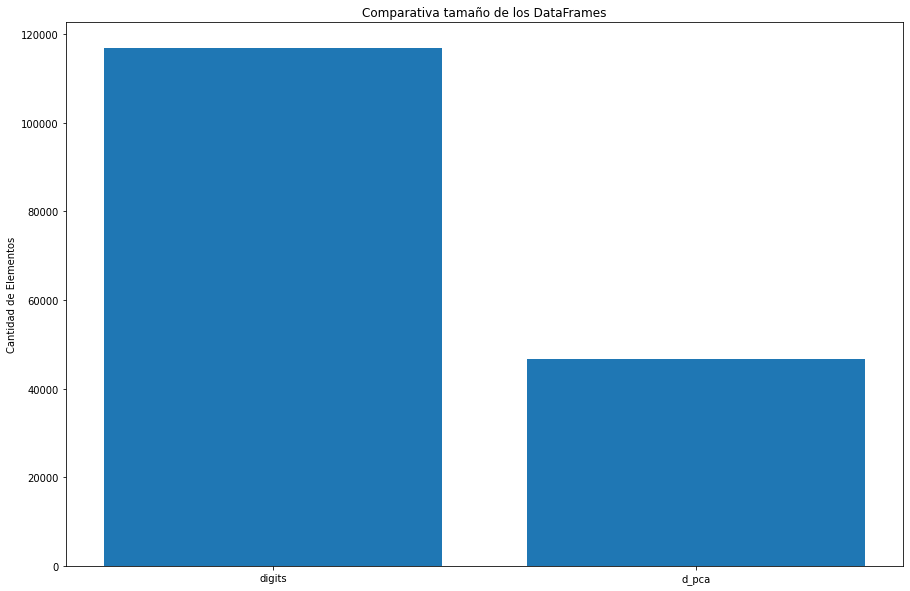

In [40]:
print('digits tiene', digits.size, 'elementos')
print('d_pca tiene', d_pca.size, 'elementos')

fig = plt.figure(figsize=(15,10))
plt.bar(x =['digits', 'd_pca'], height = [digits.size,d_pca.size])
plt.title('Comparativa tamaño de los DataFrames')
plt.ylabel('Cantidad de Elementos')
plt.show()

Se observa que d_pca tiene la misma cantidad de datos que d_atributos.

digits usa un total de: 467348 bytes
d_pca usa un total de: 366716 bytes


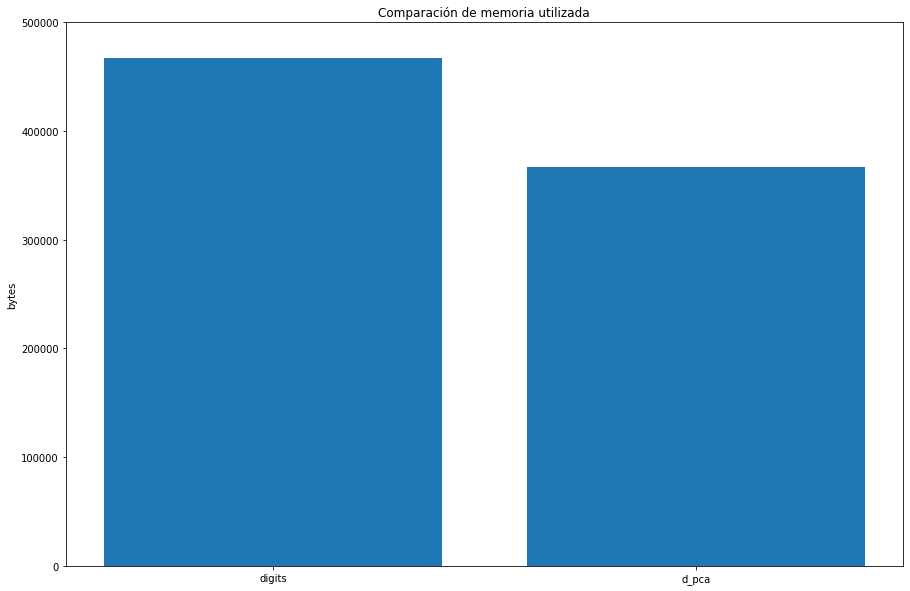

In [41]:
#Se suma la memoria de cada columna para conocer el total
s3 = 0
memoria = d_pca.memory_usage() #Se determina la memoria usada en d_pca por columna
for i in range(0,len(memoria)):
    s3 += memoria[i]
print('digits usa un total de:', s, 'bytes')    
print('d_pca usa un total de:',s3, 'bytes') 

lista = [1e5 * i for i in range(6)]
fig = plt.figure(figsize=(15,10))
plt.bar(x = ['digits', 'd_pca'], height = [s,s3])
plt.yticks(lista)
plt.title('Comparación de memoria utilizada')
plt.ylabel('bytes')
plt.show()

Se observa que  a pesar de lo recien dicho d_pca ocupa mas bytes que d_atributos.

In [42]:
X = digits.drop('target',axis = 1)
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
start_time = time.time()
knn_g.fit(X_train, y_train)
time_original = time.time() - start_time#tiempo en que se ejecutó el modelo
print('El modelo se ejecutó en %s segundos con digits' % (time_original)) 

El modelo se ejecutó en 11.380294799804688 segundos con digits


In [43]:
X = d_pca.drop('target',axis=1)
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=42)
start_time = time.time()
knn_g.fit(X_train, y_train)
time_pca = time.time() - start_time#tiempo en que se ejecutó el modelo
print('El modelo se ejecutó en %s segundos con d_atributos' % (time_pca)) 

El modelo se ejecutó en 7.760922193527222 segundos con d_atributos


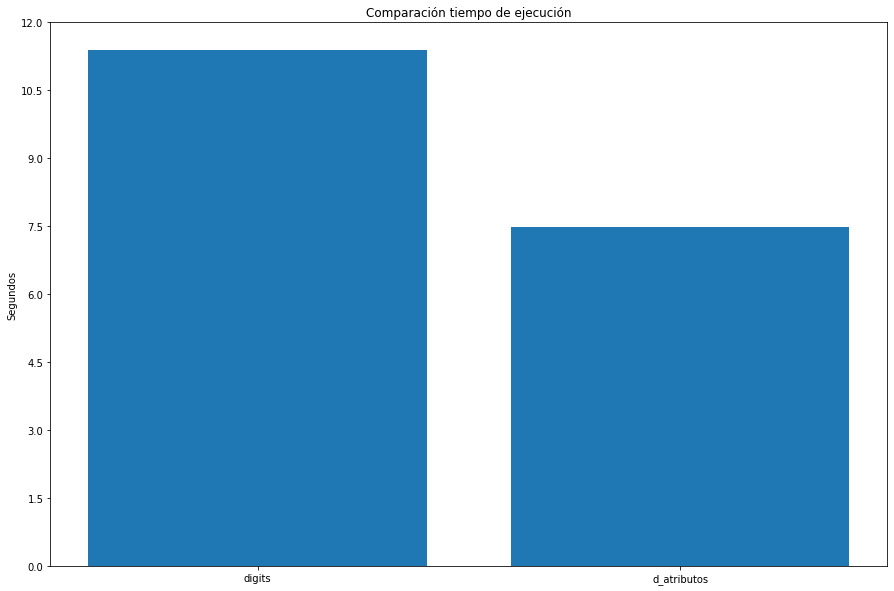

In [44]:
lista = [1.5 * i for i in range(9)]#se multiplica para que se vea mejor el gráfico
fig = plt.figure(figsize=(15,10))
plt.bar(x = ['digits', 'd_atributos'], height = [time_original,time_atributos])
plt.yticks(lista)
plt.title('Comparación tiempo de ejecución')
plt.ylabel('Segundos')
plt.show()

Se observa que en todos los casos d_pca tiene menores valores al igual que con d_atributos, la única diferencia entre estos es que d_pca ocupa más memoria que d_atributos.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [45]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = model.predict(X_test)
    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = y_pred[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            if index < X_aux.shape[0]:
                data  = X_aux[index, :].reshape(8,8)
                label_pred = str(int(y_aux_pred[index]))
                label_true = str(int(y_aux_true[index]))
                ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
                ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
                ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
                ax[i][j].get_xaxis().set_visible(False)
                ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

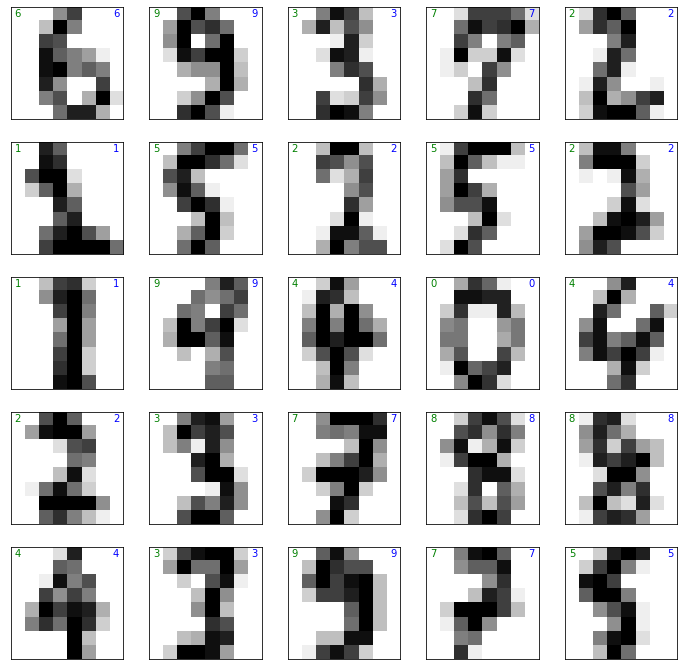

In [46]:
mostar_resultados(digits,model = KNeighborsClassifier() ,nx=5, ny=5,label = "correctos")

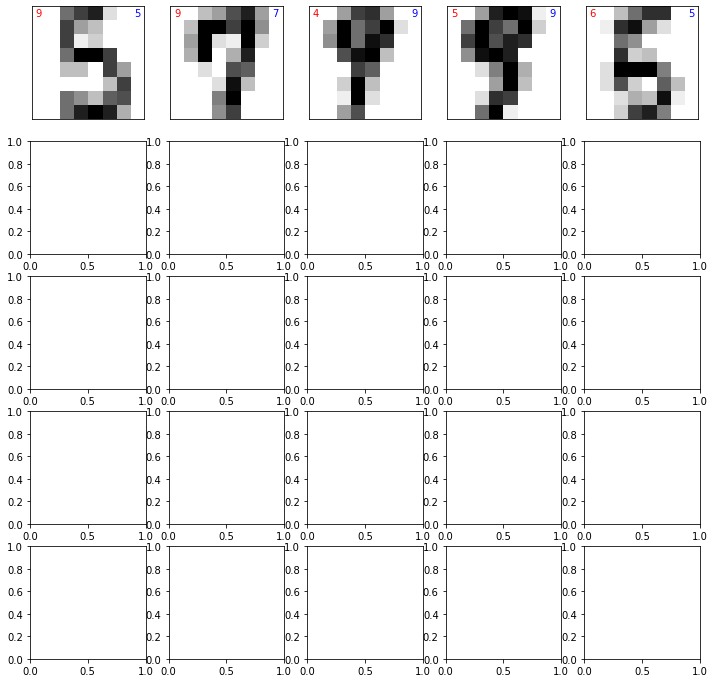

In [47]:
mostar_resultados(digits,model = KNeighborsClassifier() ,nx=5, ny=5,label = "incorrectos")

En mi opinión las fallas en identificar los números se pueden deber a la similaridad entre el que debiese ser y el incorrecto, por ejemplo el 6 y 5 solo se diferencian en el que el 6 es cerrado al verlo en pixeles, y debido a las sombras causadas por los pixeles se puede confundir el 7 con un 9 o un 5 con un 9. ademas como de 30 imagenes que podemos observar solo 5 estuvieron incorrectas se puede decir que el modelo fue bastante acertado.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En mi opinion el mejor modelo para este caso es el de K-Nearest Neighbors, pues de los 100 que se van a plotear solo se obtienen 5 malos lo cual es un 5% de error, además que al ver sus metricas junto al tiempo que le toma en ejecutarse lo deja como el mejor entre las 3 opciones.

Respecto a las preguntas iniciales no comprendo a cuales preguntas se refiere la redacción de esta pregunta, si se refiere a las preguntas del ejercicio 1, fue posible mostrar con las celdas correspondientes lo pedido.


Entre mis dificultades se encuentra el hecho de que mi computador no puede correr el codigo de una sola vez pues no soporta la sobrecarga y se termina apagando, por lo cual cada vez que tengo que correr el codigo nuevamente debo hacerlo celda por celda dandole tiempo a dar el out antes de seguir.
La función mostrar_resultados no funcionaba como estaba entregada, la tuve que arreglar a ensayo y error.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [48]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Definición del problema

Crear un modelo que pueda predecir el valor promedio de cada propiedad según los datos de la esta.

## Estadística descriptiva

In [49]:
a, b = housing.shape
print(f'El conjunto de datos tiene {a} filas y {b} columnas')

El conjunto de datos tiene 20640 filas y 10 columnas


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [52]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

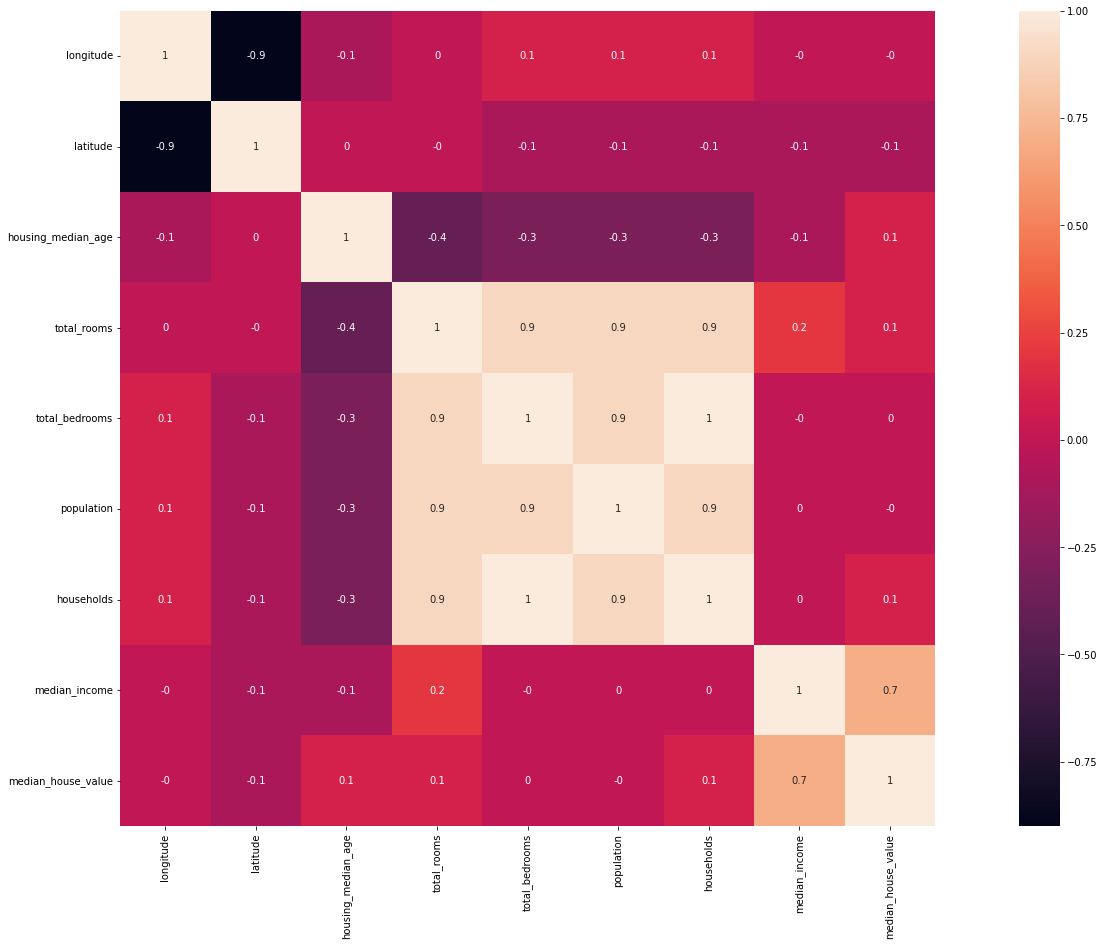

In [53]:
import seaborn as sns
#matriz de correlacion
corr_mat=housing.corr(method='pearson')
plt.figure(figsize=(30,15))
sns.heatmap(corr_mat.round(1),vmax=1,square=True,annot=True,fmt='g')
plt.show()

## Visualización descriptiva

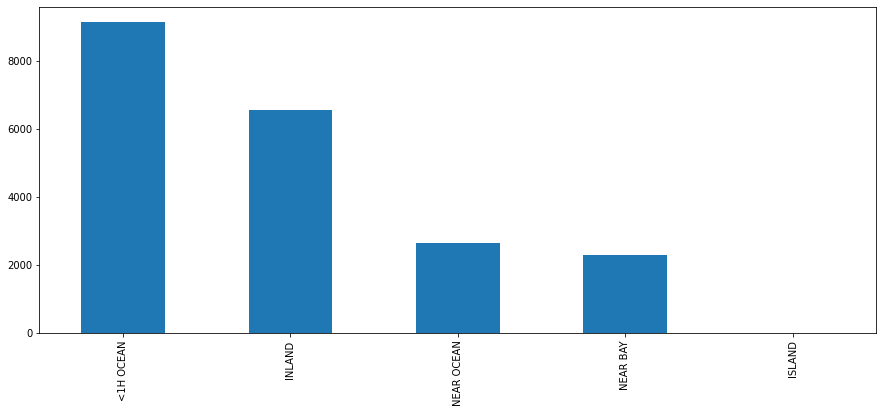

In [54]:
# Gráficos de distribución (gráfico de barras) de datos de columna
plt.figure(figsize=(15, 6))
housing["ocean_proximity"].value_counts().plot(kind ="bar")
plt.show()

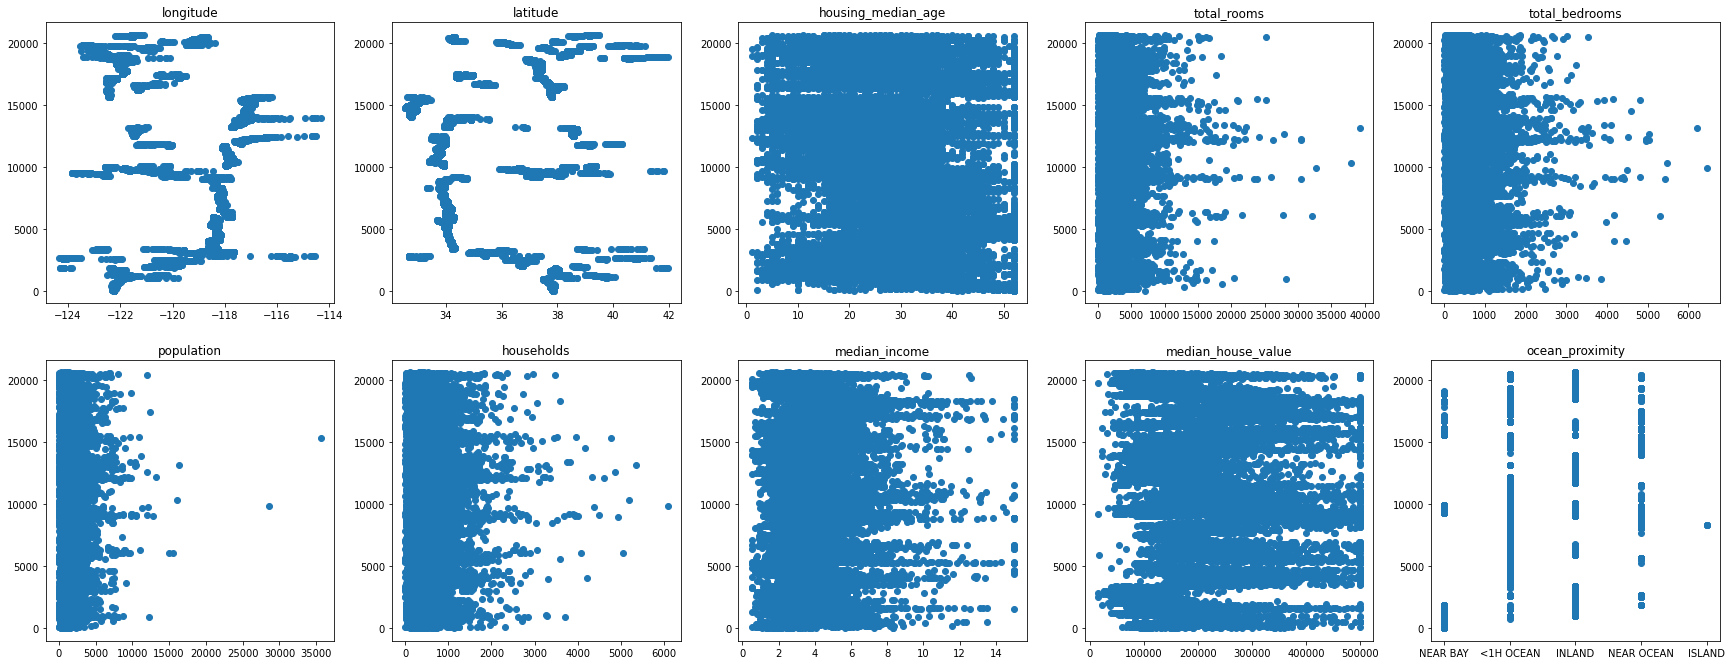

In [55]:
c = housing.columns
y = [k for k in range(len(housing))]
plt.figure(figsize = (30,30))
for k in range(10):
    plt.subplot(5,5,k+1)
    plt.scatter(housing[c[k]], y)
    plt.title(c[k])

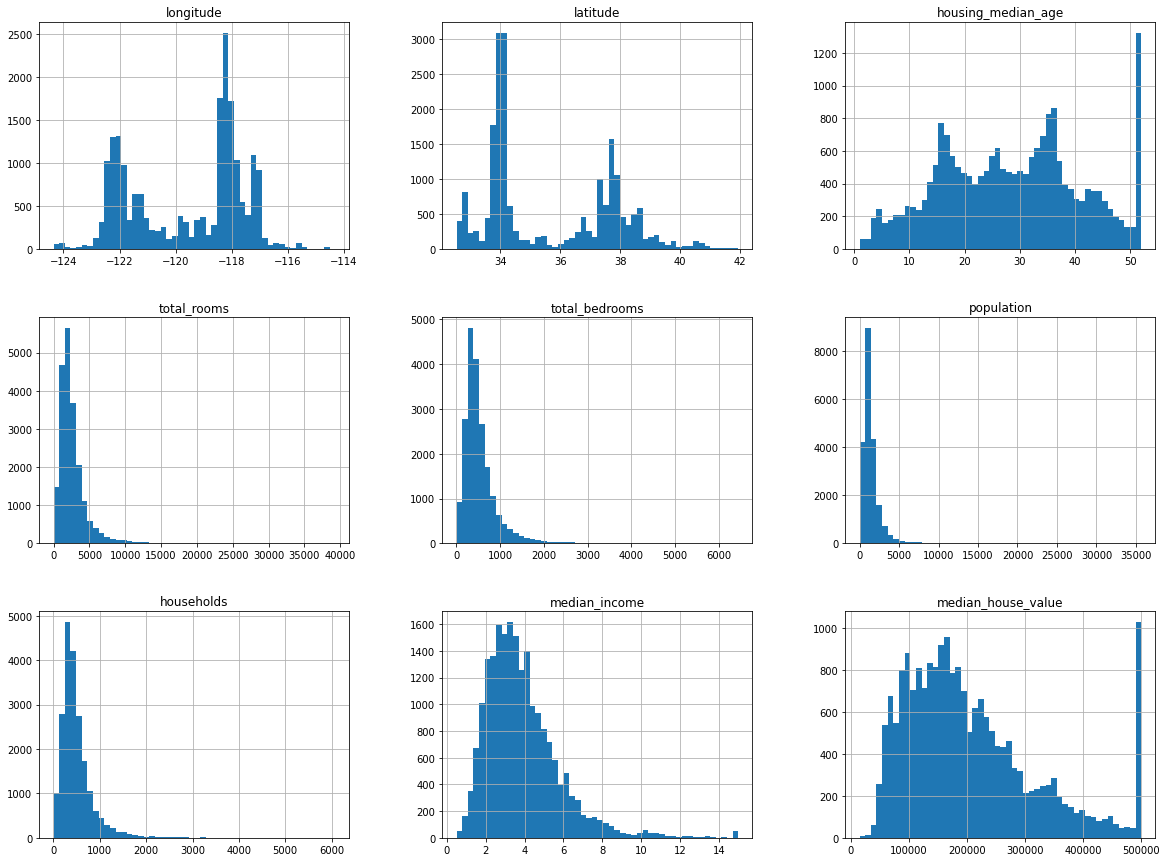

In [56]:
housing.hist(bins= 50, figsize= (20,15))
plt.show()

<Figure size 1440x1440 with 0 Axes>

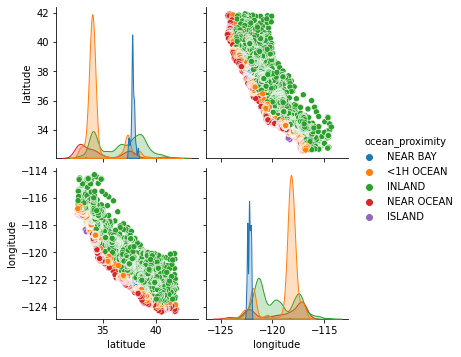

In [57]:
plt.figure(figsize = (20,20))
sns.pairplot(data=housing[["latitude","longitude","ocean_proximity"]],hue="ocean_proximity")
plt.show()

<Figure size 1080x1080 with 0 Axes>

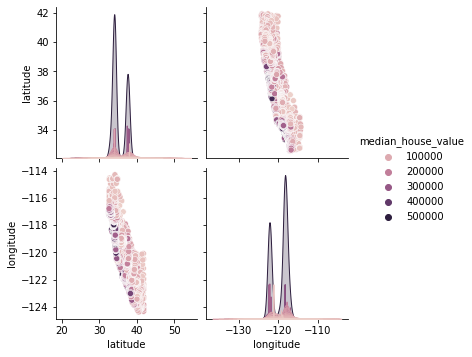

In [58]:
plt.figure(figsize = (15,15))
sns.pairplot(data=housing[["latitude","longitude","median_house_value"]],hue="median_house_value")
plt.show()

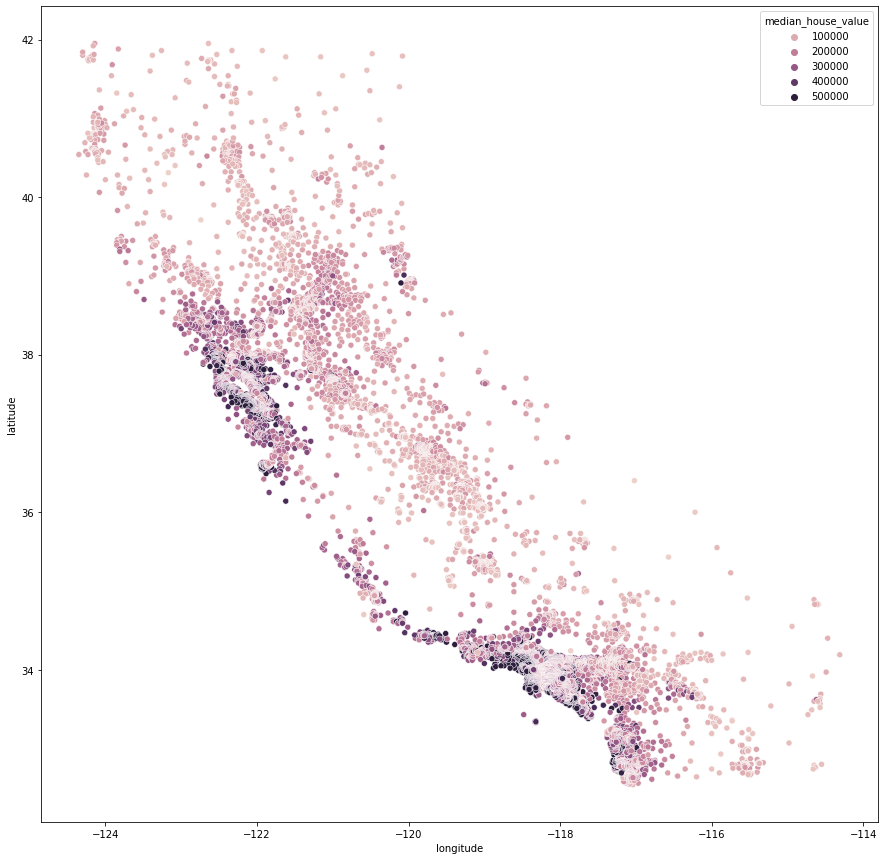

In [59]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=housing.longitude, y=housing.latitude, hue=housing["median_house_value"])
plt.show()

Vemos que el precio aumenta cerca de la costa.

## Preprocesamiento

In [60]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [61]:
housing["total_bedrooms"] = housing["total_bedrooms"].replace(np.nan , housing["total_bedrooms"].mean())

In [62]:
housing.isnull().values.any()

False

In [63]:
housing["ocean_proximity"] = housing["ocean_proximity"].map({"<1H OCEAN":5,"NEAR OCEAN":4,"INLAND":3,"NEAR BAY":2,"ISLAND":1})

In [64]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


In [65]:
X = housing.drop(columns="median_house_value").values
y = housing["median_house_value"].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Selección de modelo

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [67]:
#Crear conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)
#largo del conjunto de entrenamiento y de testeo
print('El train set tiene',len(X_train), 'filas.')
print('El test set tiene',len(X_test), 'filas.')

El train set tiene 14447 filas.
El test set tiene 6192 filas.


In [68]:
from metrics_regression import *
from sklearn.metrics import r2_score

## Regresión Logística

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 250)

start_time = time.time() #Tiempo de inicio 

lr_g_result = lr.fit(X_train, y_train)

y_pred = lr_g_result.predict(X_test)
grid_r2_score_lr = r2_score(y_test, y_pred)


# Se presenta el tiempo que tomó ajustarse el modelo
t_lr = time.time() - start_time
print('Tomó %s segundos' % t_lr) 

Tomó 800.0566802024841 segundos


In [70]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

df_metrics_lr = summary_metrics(df_temp)
df_metrics_lr['r2'] =  round(grid_r2_score_lr,4)

print('\nMetricas para el regresor CRIM:')
df_metrics_lr


Metricas para el regresor CRIM:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,104633.2455,2.187940e+10,147916.8602,0.5837,0.4324,0.5062,0.5837,0.4024,-0.667


## Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

metric_RFR = { 
    "n_estimators"      : [100],
    "min_samples_split" : [2,4,8],
    "max_features"      : ["auto", "sqrt", "log2"],
    "bootstrap": [True, False],
}#Hiper-parámetros a comparar con gridsearch

RFR = RandomForestRegressor()

RFR_g = GridSearchCV(estimator = RFR, param_grid = metric_RFR, n_jobs=-1, cv=5)

start_time = time.time() #Tiempo de inicio 

RFR_g_result=RFR_g.fit(X_train, y_train)
    
y_pred = RFR_g_result.predict(X_test)
grid_r2_score_RFR = r2_score(y_test, y_pred)

t_RFR = time.time() - start_time
print('Tomó %s segundos' % t_RFR) 

Tomó 225.16963744163513 segundos


In [72]:
print('El mejor r2-score tuvo un valor de %f usando %s' % (grid_r2_score_RFR, RFR_g_result.best_params_))

El mejor r2-score tuvo un valor de 0.823381 usando {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [73]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

df_metrics_RFR = summary_metrics(df_temp)
df_metrics_RFR['r2'] =  round(grid_r2_score_RFR,4)

print('\nMetricas para el regresor CRIM:')
df_metrics_RFR


Metricas para el regresor CRIM:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,31626.9272,2.318190e+09,48147.5838,0.1783,0.161,0.153,0.1783,0.1598,0.8234


## K-Nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier

metric_knn = {
          'n_neighbors' : [3, 6, 15,30],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski'],
          'algorithm' : ['auto','brute', 'kd_tree']
          }#Hiper-parámetros a comparar con gridsearch

knn = KNeighborsClassifier()

knn_g = GridSearchCV(estimator = knn, param_grid = metric_knn, n_jobs=-1, cv=5)

start_time = time.time() #Tiempo de inicio 

knn_g_result = knn_g.fit(X_train, y_train)

y_pred = knn_g_result.predict(X_test)
grid_r2_score_knn = r2_score(y_test, y_pred)

t_knn = time.time() - start_time
print('Tomó %s segundos' % t_knn) 

Tomó 98.61984395980835 segundos


In [75]:
print("El mejor r2-score tuvo un valor de: %f usando los parametros: \n %s" % (grid_r2_score_knn, knn_g_result.best_params_))

El mejor r2-score tuvo un valor de: 0.135915 usando los parametros: 
 {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}


In [76]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

df_metrics_knn = summary_metrics(df_temp)
df_metrics_knn['r2'] =  round(grid_r2_score_knn,4)

print('\nMetricas para el regresor CRIM:')
df_metrics_knn


Metricas para el regresor CRIM:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,74912.699,1.134146e+10,106496.2987,0.3645,0.3205,0.3624,0.3645,0.403,0.1359


## Extra Trees Regressor

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

ETR = ExtraTreesRegressor()
metric_ETR = { 
    "n_estimators"      : [10,50,100],
    "max_depth"         : [2,4,8,10, None],
    "max_features"      : ["auto", "sqrt", "log2"]
}#Hiper-parámetros a comparar con gridsearch

ETR_g = GridSearchCV(estimator = ETR, param_grid = metric_ETR, n_jobs=-1, cv=5)

start_time = time.time() #Tiempo de inicio 

ETR_g_result = ETR_g.fit(X_train, y_train)
y_pred = ETR_g_result.predict(X_test)
grid_r2_score_ETR = r2_score(y_test, y_pred)

t_ETR = time.time() - start_time
print('Tomó %s segundos' % t_ETR) 

Tomó 54.317816972732544 segundos


In [78]:
print("El mejor r2-score tuvo un valor de: %f usando los parametros: \n %s" % (grid_r2_score_ETR, ETR_g_result.best_params_))

El mejor r2-score tuvo un valor de: 0.805451 usando los parametros: 
 {'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


In [79]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

df_metrics_ETR = summary_metrics(df_temp)
df_metrics_ETR['r2'] =  round(grid_r2_score_ETR,4)

print('\nMetricas para el regresor CRIM:')
df_metrics_ETR


Metricas para el regresor CRIM:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,33830.5429,2.553538e+09,50532.5404,0.1909,0.1734,0.1637,0.1909,0.1713,0.8055


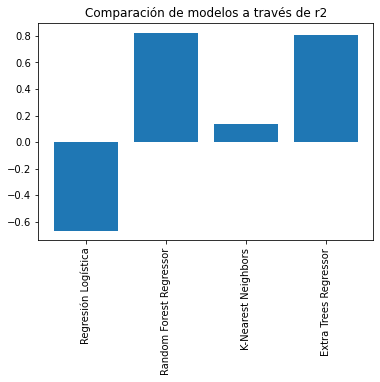

In [80]:
#Valores para el eje x
eje_x = ['Regresión Logística', 'Random Forest Regressor', 'K-Nearest Neighbors', 'Extra Trees Regressor']
#Valores para el eje y
eje_y = [df_metrics_lr['r2'][0],df_metrics_RFR['r2'][0],df_metrics_knn['r2'][0],df_metrics_ETR['r2'][0]]
 
#Creamos Gráfica
plt.bar(eje_x, eje_y)

plt.title('Comparación de modelos a través de r2')
plt.xticks(rotation='vertical') 
plt.show()

Notamos que el mejor r2 lo tiene Random Forest Regressor seguido de Extra Trees Regressor y KNN, en último lugar con un r2 muy bajo esta Regresión Logística.

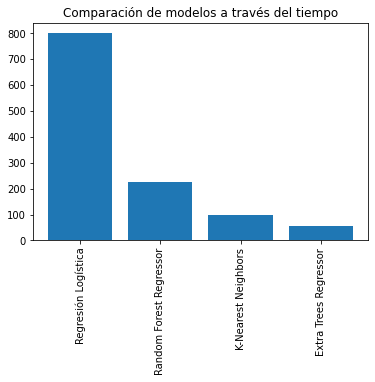

In [81]:
#Valores para el eje x
eje_x = ['Regresión Logística', 'Random Forest Regressor', 'K-Nearest Neighbors', 'Extra Trees Regressor']
#Valores para el eje y
eje_y = [t_lr,t_RFR,t_knn,t_ETR]
 
#Creamos Gráfica
plt.bar(eje_x, eje_y)

plt.title('Comparación de modelos a través del tiempo')
plt.xticks(rotation='vertical') 
plt.show()

A pesar de que el tiempo puede variar según sea la compilación, nos permite darnos una idea promedio de cuanto demoran en proporción cada modelo en optimizarse.

## Visualizaciones del modelo

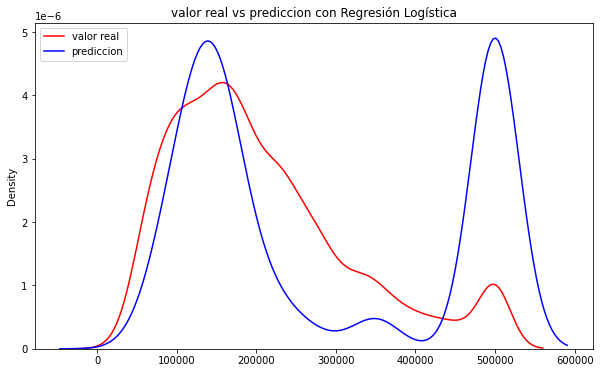

In [82]:
y_pred = lr_g_result.predict(X_test)
plt.figure(figsize=(10, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="valor real")
sns.distplot(y_pred, hist=False, color="b", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion con Regresión Logística')
plt.legend()
plt.show()

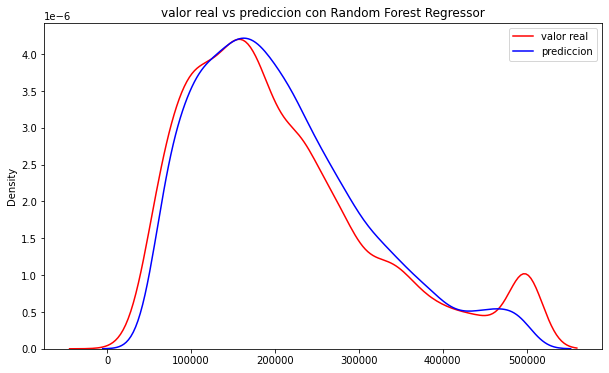

In [83]:
y_pred = RFR_g_result.predict(X_test)
plt.figure(figsize=(10, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="valor real")
sns.distplot(y_pred, hist=False, color="b", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion con Random Forest Regressor')
plt.legend()
plt.show()

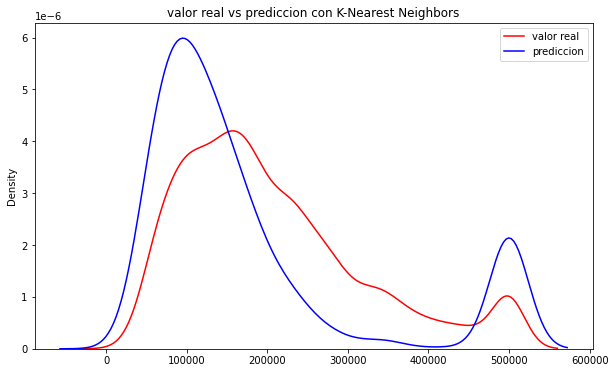

In [84]:
y_pred = knn_g_result.predict(X_test)
plt.figure(figsize=(10, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="valor real")
sns.distplot(y_pred, hist=False, color="b", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion con K-Nearest Neighbors')
plt.legend()
plt.show()

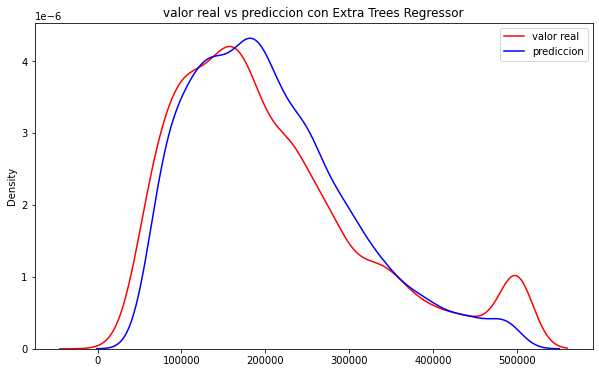

In [85]:
y_pred = ETR_g_result.predict(X_test)
plt.figure(figsize=(10, 6))

ax = sns.distplot(y_test, hist=False, color="r", label="valor real")
sns.distplot(y_pred, hist=False, color="b", label="prediccion" , ax=ax)

plt.title('valor real vs prediccion con Extra Trees Regressor')
plt.legend()
plt.show()

## Conclusiones

De los cuatro modelos notamos que Regresión Logística fue el peor, en la defensa del modelo hay que mencionar que fue el único en el cual no se realizo optimizacion con hiperparametros, pero esto se debe a a que las pruebas previas hechas con dicho modelo mostro que demoraba demasiado en compilar por lo menos más de 40 min.

Respecto a los otros tres modelos quedan muy parecidos Random Forest Regressor y Extra Trees Regressor, siendo un poco mejor el primero respecto a r2, en tiempos de compilación es un bastante mejor el segundo, quedando en tercer lugar KNN siendo de estos tres el segundo más rápido para compilar, pero tiene peor r2.

Asi se concluye que de los 4 modelos comparados el mejor corresponde al de Extra Trees Regressor pues en r2 que tiene muy poca diferencia con Random Forest Regressor y demora aproximadamente un cuarto del tiempo que le toma a este en compilar, por lo que a pesar de ser un poco más impresiso al observar el gráfico valor real v/s prediccion se considera que vale más la pena por el tiempo y su poca diferencia en r2.